In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [8]:
# Reading in target csv (dataframe made up of the 20 proteins that had the most varience between
# the healthy and Alzheimer’s samples) as df, and the important features csv (
# the features identified from the decision tree) as df2. 
df = pd.read_csv('Target.csv')
df2= pd.read_csv('Important_features.csv')

In [10]:
# Checking the first df head, tail, and descriptive statistics 
df.head()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
0,637.85,36.35,0.00,2.69,2.36,3.14,2.49,1.49,11.04,10.16,...,22.56,0.20,0.26,22.64,20.80,606.48,0.22,571.87,4.59,1.0
1,427.77,23.19,0.73,49.12,36.89,1.35,37.79,0.44,11.04,14.46,...,17.10,0.10,8.81,6.22,17.53,129.46,0.22,598.26,1.15,1.0
2,225.54,19.93,8.03,6.08,5.45,0.64,6.12,0.44,6.95,6.55,...,17.10,0.45,18.47,8.40,50.08,59.46,0.49,897.79,4.59,1.0
3,32.41,3.92,0.73,4.35,0.00,80.83,3.98,45.44,13.82,4.81,...,9.69,6.57,8.81,2.27,27.95,59.46,0.22,499.46,8.91,1.0
4,1029.88,19.93,0.73,11.38,0.00,0.64,0.00,3.32,17.23,16.61,...,50.90,0.45,5.22,34.10,72.57,216.85,3.06,4155.44,13.52,1.0


In [12]:
df.tail()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
33,286.78,19.93,0.73,25.10,18.74,0.90,18.00,0.44,8.79,7.60,...,12.91,0.58,23.47,11.23,82.09,280.52,740.71,14022.60,6578.09,0.0
34,1534.97,23.19,0.73,8.36,7.53,2.35,7.51,0.73,11.04,12.57,...,86.87,35.20,0.26,29.76,30.40,167.59,0.49,684.95,7.19,0.0
35,336.54,10.73,2.01,6.08,5.45,0.24,0.00,0.20,11.04,4.10,...,29.65,26.47,95.32,58.46,257.62,129.46,0.49,18373.83,0.47,0.0
36,163.67,4.68,26.14,4.35,0.00,0.15,4.45,0.73,8.79,7.60,...,17.10,0.20,47.55,8.40,35.93,99.96,0.49,4346.93,0.21,0.0
37,192.14,12.55,14.65,13.92,0.00,0.90,13.54,1.08,6.95,6.55,...,17.10,1.09,378.16,9.72,23.62,167.59,0.49,1474.12,3.61,0.0


In [14]:
df.describe()

,Protein AMBP OS=Homo sapiens GN=AMBP PE=1 SV=1,Apolipoprotein D OS=Homo sapiens GN=APOD PE=1 SV=1,Thymosin beta-4 OS=Homo sapiens GN=TMSB4X PE=1 SV=2,Isoform 5 of Osteopontin OS=Homo sapiens GN=SPP1,Isoform B of Osteopontin OS=Homo sapiens GN=SPP1,Prostatic acid phosphatase OS=Homo sapiens GN=ACPP PE=1 SV=3,Osteopontin OS=Homo sapiens GN=SPP1 PE=1 SV=1,Prolactin-inducible protein OS=Homo sapiens GN=PIP PE=1 SV=1,CD59 glycoprotein OS=Homo sapiens GN=CD59 PE=1 SV=1,Isoform LMW of Kininogen-1 OS=Homo sapiens GN=KNG1,...,Ig lambda-2 chain C regions OS=Homo sapiens GN=IGLC2 PE=1 SV=1,Zinc-alpha-2-glycoprotein OS=Homo sapiens GN=AZGP1 PE=1 SV=2,Protein S100-A9 OS=Homo sapiens GN=S100A9 PE=1 SV=1,Alpha-1-acid glycoprotein 1 OS=Homo sapiens GN=ORM1 PE=1 SV=1,Serotransferrin OS=Homo sapiens GN=TF PE=1 SV=3,Ig kappa chain C region OS=Homo sapiens GN=IGKC PE=1 SV=1,Hemoglobin subunit alpha OS=Homo sapiens GN=HBA1 PE=1 SV=2,Serum albumin OS=Homo sapiens GN=ALB PE=1 SV=2,Hemoglobin subunit beta OS=Homo sapiens GN=HBB PE=1 SV=2,Alzheimer’s
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,424.514474,18.640263,6.930789,12.155263,8.048421,3.928684,9.865000,2.204737,9.121579,9.427632,...,26.341053,10.397105,25.852632,25.865789,52.117895,207.375263,28.288421,3308.519737,216.526053,0.500000
std,357.089785,9.965932,23.093800,10.844758,9.318602,13.001432,9.072488,7.265895,3.105119,5.142699,...,17.684645,14.626445,65.530481,28.299542,63.507540,175.899646,122.282314,8295.129988,1066.015636,0.506712
min,11.830000,3.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.270000,3.200000,...,2.730000,0.000000,0.000000,0.480000,3.480000,5.020000,0.000000,7.690000,0.000000,0.000000
25%,192.140000,10.730000,0.000000,4.350000,0.000000,0.640000,3.665000,0.440000,6.950000,5.210000,...,17.100000,0.482500,1.490000,7.530000,17.530000,82.837500,0.490000,382.150000,4.590000,0.000000
50%,323.605000,19.930000,0.730000,8.820000,5.765000,1.105000,7.510000,0.730000,8.790000,8.485000,...,19.830000,2.805000,5.220000,12.950000,27.375000,167.590000,2.695000,625.870000,9.955000,0.500000
75%,557.502500,23.190000,3.660000,16.980000,13.587500,2.350000,13.540000,1.990000,11.040000,11.710000,...,29.650000,15.610000,18.470000,29.760000,59.767500,264.602500,5.060000,1954.037500,23.647500,1.000000
max,1534.970000,42.170000,140.360000,49.120000,36.890000,80.830000,37.790000,45.440000,17.230000,25.040000,...,86.870000,46.710000,378.160000,130.100000,268.320000,784.010000,740.710000,47313.830000,6578.090000,1.000000


In [16]:
# Setting the X and y values for first datasets (X = 20 proteins, y= Alzheimer's column]

X = df.drop(columns=['Alzheimer’s'])
y = df['Alzheimer’s']

In [18]:
# Creating train test split for both dataframes, test size 0.15 because of 
# Small size of data samples. 

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.15, 
                                                    random_state=42,
                                                    shuffle=True)

In [20]:
# Checking sizes of train and test sets
X_train.shape

(32, 20)

In [22]:
X_test.shape

(6, 20)

In [24]:
# Building models for a plain logisitc regression and one with higher penalties 
# To prevent overfitting 

m_plain = LogisticRegression()
m_complex = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', C=1.0)

In [26]:
# Scaling data first df data 

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [28]:
# Fitting model, df1 model one(simple Logistic Regression):
m_plain.fit(X_train_sc, y_train)

LogisticRegression()

In [30]:
# Fitting model, df1 model two (ElasticNet):
m_complex.fit(X_train_sc, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [32]:
# Predicting test values for the first df's models 
preds1 = m_plain.predict(X_test_sc)
preds2= m_complex.predict(X_test_sc)

In [34]:
# Taking a look at accuracy measurements; 
# because samples provided are so small a prediction model will not be as beneficial 
# as I initially would have liked it to be but it's just for fun 
plain_accuracy1 = accuracy_score(y_test, preds1)
complex_accuracy1 = accuracy_score(y_test, preds2)
print(f'The accuracy of the simple classification prediction model is: {plain_accuracy1*100}')
print(f'The accuracy of the complex classification prediction model is: {complex_accuracy1*100}')

The accuracy of the simple classification prediction model is: 83.33333333333334
The accuracy of the complex classification prediction model is: 83.33333333333334


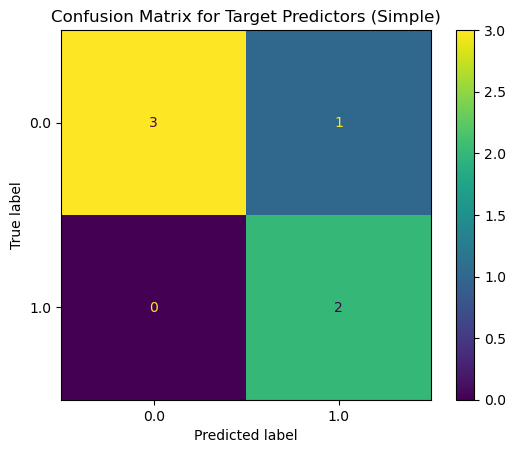

In [36]:
# Creating a confusion matrix for the first model of df1 aka plain

cm = confusion_matrix(y_test, preds1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=m_plain.classes_)
disp.plot()
plt.title('Confusion Matrix for Target Predictors (Simple)')
plt.savefig("Target_Proteins1.png")
plt.show()

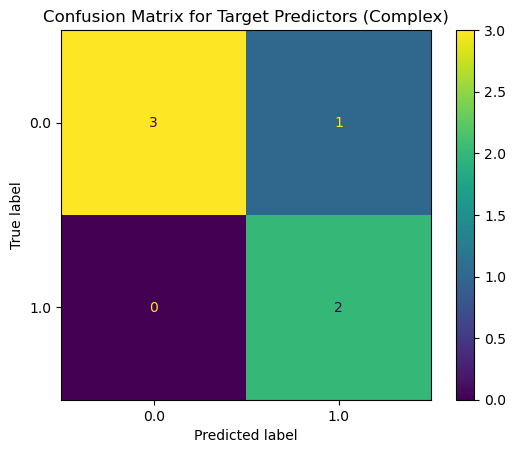

In [38]:
# Creating a confusion matrix for the second model of df1 aka complex
cm2 = confusion_matrix(y_test, preds2, labels=m_complex.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=m_complex.classes_)
disp2.plot()
plt.title('Confusion Matrix for Target Predictors (Complex)')
plt.savefig("Target_Proteins2.png")
plt.show()

# 2.) DF2 modeling (Decision Tree Identified Features)

In [40]:
# Repeating a similar process for the second dataframe starting with checking the data
df2.head()

,"Keratin, type I cytoskeletal 9 OS=Homo sapiens GN=KRT9 PE=1 SV=3",Ig gamma-1 chain C region OS=Homo sapiens GN=IGHG1 PE=1 SV=1,"Keratin, type II cytoskeletal 3 OS=Homo sapiens GN=KRT3 PE=1 SV=3",Alzheimer’s
0,1.80,16.42,0.22,0
1,0.85,7.71,0.42,0
2,0.95,11.32,0.56,0
3,4.75,2.66,0.64,0
4,1.95,4.65,0.42,0


In [42]:
df2.tail()

,"Keratin, type I cytoskeletal 9 OS=Homo sapiens GN=KRT9 PE=1 SV=3",Ig gamma-1 chain C region OS=Homo sapiens GN=IGHG1 PE=1 SV=1,"Keratin, type II cytoskeletal 3 OS=Homo sapiens GN=KRT3 PE=1 SV=3",Alzheimer’s
33,0.51,5.16,0.05,1
34,0.51,4.65,0.00,1
35,1.52,11.32,0.00,1
36,0.00,5.16,0.00,1
37,0.67,5.72,0.00,1


In [44]:
df2.describe()

,"Keratin, type I cytoskeletal 9 OS=Homo sapiens GN=KRT9 PE=1 SV=3",Ig gamma-1 chain C region OS=Homo sapiens GN=IGHG1 PE=1 SV=1,"Keratin, type II cytoskeletal 3 OS=Homo sapiens GN=KRT3 PE=1 SV=3",Alzheimer’s
count,38.000000,38.000000,38.000000,38.000000
mean,1.464474,8.182105,0.264211,0.500000
std,1.772792,4.347907,0.238369,0.506712
min,0.000000,0.000000,0.000000,0.000000
25%,0.377500,4.650000,0.050000,0.000000
50%,0.670000,7.350000,0.220000,0.500000
75%,1.625000,11.320000,0.420000,1.000000
max,6.440000,16.420000,1.000000,1.000000


In [46]:
# Setting the X and Y variables for prediction 
X2= df2.drop(columns=['Alzheimer’s'])
y2=df2['Alzheimer’s']

In [48]:
# Train test split for x and y variables 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2,
                                                    test_size=.15, 
                                                    random_state=42,
                                                    shuffle=True)

In [50]:
# Checking shape of X test and X train 
X2_train.shape

(32, 3)

In [52]:
X2_test.shape

(6, 3)

In [54]:
# Scaling X values 
ss = StandardScaler()
X2_train_sc = ss.fit_transform(X2_train)
X2_test_sc = ss.transform(X2_test)

In [56]:
# Instaintiating Logistic Regression models
m_plain2 = LogisticRegression()

In [58]:
m_complex2 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', C=1.0)

In [60]:
# Fitting models on training data 
m_plain2.fit(X2_train_sc, y2_train)

LogisticRegression()

In [62]:
m_complex2.fit(X2_train_sc, y2_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [64]:
# Predicting y test values 
preds3 = m_plain2.predict(X2_test_sc)
preds4= m_complex2.predict(X2_test_sc)

In [72]:
preds3

array([1, 1, 0, 0, 1, 1])

In [74]:
y2_test

33    1
36    1
4     0
13    0
30    1
26    1
Name: Alzheimer’s, dtype: int64

In [76]:
# Calculating how accurate the model is at predicting 
plain_accuracy2 = accuracy_score(y2_test, preds3)
complex_accuracy2 = accuracy_score(y2_test, preds4)
print(f'The accuracy of the simple classification prediction model is: {plain_accuracy2*100}')
print(f'The accuracy of the complex classification prediction model is: {complex_accuracy2*100}')                           

The accuracy of the simple classification prediction model is: 100.0
The accuracy of the complex classification prediction model is: 100.0


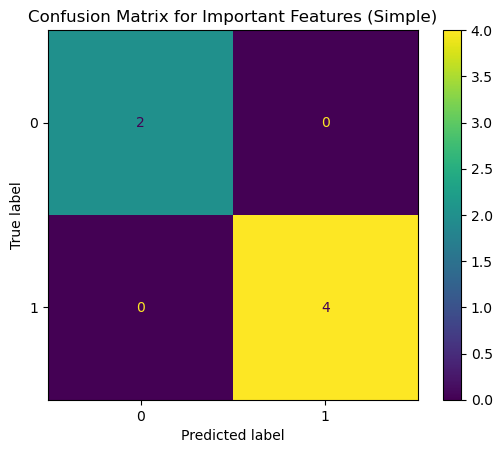

In [80]:
# Plotting a confusion matrix for df2 simple 
cm3 = confusion_matrix(y2_test, preds3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=m_plain2.classes_)
disp3.plot()
plt.title('Confusion Matrix for Important Features (Simple)')
plt.savefig("Important_Features1.png")
plt.show()

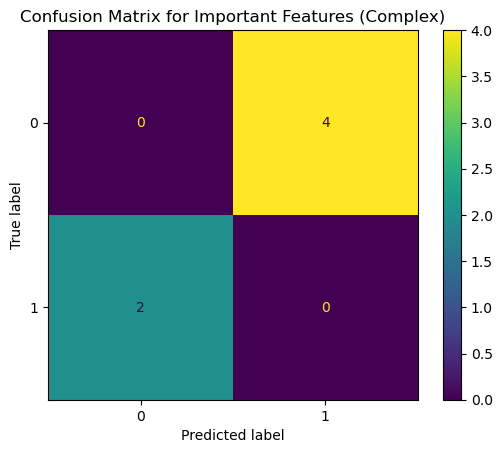

In [82]:
# Plotting a confusion matrix for DF2 complex
cm4 = confusion_matrix(y_test, preds4, labels=m_complex2.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                              display_labels=m_complex2.classes_)
disp4.plot()
plt.title('Confusion Matrix for Important Features (Complex)')
plt.savefig("Important_Features2.png")
plt.show()

### Though model accuracy in this particular situation isn't a reliable metric for answering this particular question at the moment (further research is necessary) it show that these proteins are proteins of interest for additional study and targeting with medication. Armed with this knowledge clinicians can identify Alzhemier's patients way before symptoms first show. As with many diseases early detection is key. 

In [95]:
# Gathering the training accuracy scores for the two complex models
preds5 = m_complex.predict(X_train_sc)
preds6= m_complex2.predict(X2_train_sc)
plain_accuracy3 = accuracy_score(y_train, preds5)
plain_accuracy4 = accuracy_score(y2_train, preds6)

In [100]:
print(f'The accuracy of the complex classification prediction model is: {plain_accuracy3*100}')
print(f'The accuracy of the second complex classification prediction model is: {plain_accuracy4*100}')                           

The accuracy of the complex classification prediction model is: 93.75
The accuracy of the second complex classification prediction model is: 87.5
